In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
Data_df = pd.read_csv('/content/Aquaponik.csv')

In [ ]:
# SHOW DATA
Data_df.head()

,Humidity,LDR,Soil Moisture,TDS,Temperature,Motors
0,68,726,193,850.60120,28.0,0
1,72,678,194,838.16528,28.0,0
2,78,208,160,862.27417,29.3,0
3,68,716,196,851.59302,28.0,0
4,66,209,152,886.07788,29.8,0


In [ ]:
# SHOW COLUMNS
Data_df.columns

Index(['Humidity', 'LDR', 'Soil Moisture', 'TDS', 'Temperature', 'Motors'], dtype='object')

In [ ]:
# INFORMATION OF COLUMNS
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       1608 non-null   int64  
 1   LDR            1608 non-null   int64  
 2   Soil Moisture  1608 non-null   int64  
 3   TDS            1608 non-null   float64
 4   Temperature    1608 non-null   float64
 5   Motors         1608 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 75.5 KB


In [ ]:
# DESCRIPTIVE STATISTIC
Data_df.describe()

,Humidity,LDR,Soil Moisture,TDS,Temperature,Motors
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,75.827736,540.673507,310.255597,850.171152,27.973321,0.141169
std,6.990583,246.472987,153.354326,15.403191,1.215725,0.348304
min,55.000000,125.000000,144.000000,819.931030,25.000000,0.000000
25%,72.000000,288.500000,161.000000,836.598983,27.100000,0.000000
50%,77.000000,619.500000,196.000000,854.034420,28.000000,0.000000
75%,81.000000,779.000000,437.000000,861.282350,28.900000,0.000000
max,91.000000,792.000000,580.000000,886.840820,32.000000,1.000000


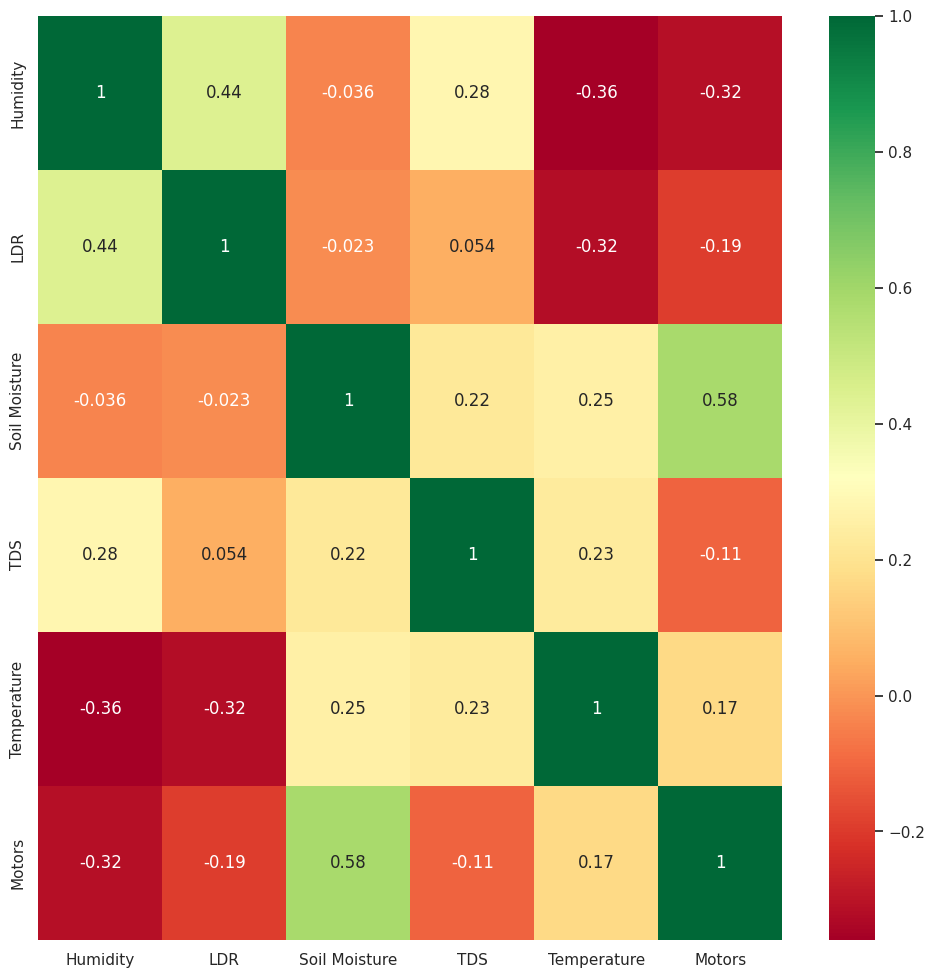

In [ ]:
# CORRELATION MATRIX BETWEEN ALL VARIABLES
plt.figure(figsize = (12, 12))
  p = sns.heatmap(Data_df.corr(), annot = True,cmap = 'RdYlGn')

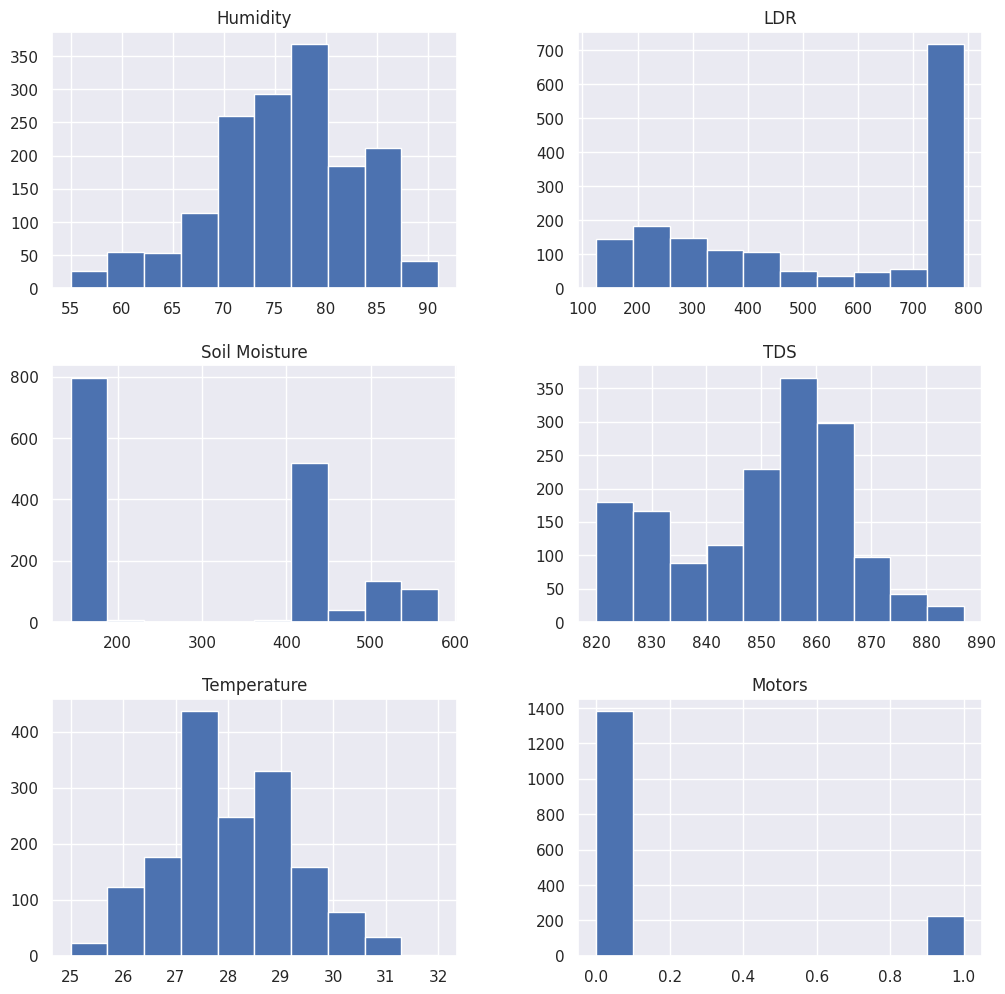

In [ ]:
# HISTOGRAM
p = Data_df.hist(figsize = (12, 12))

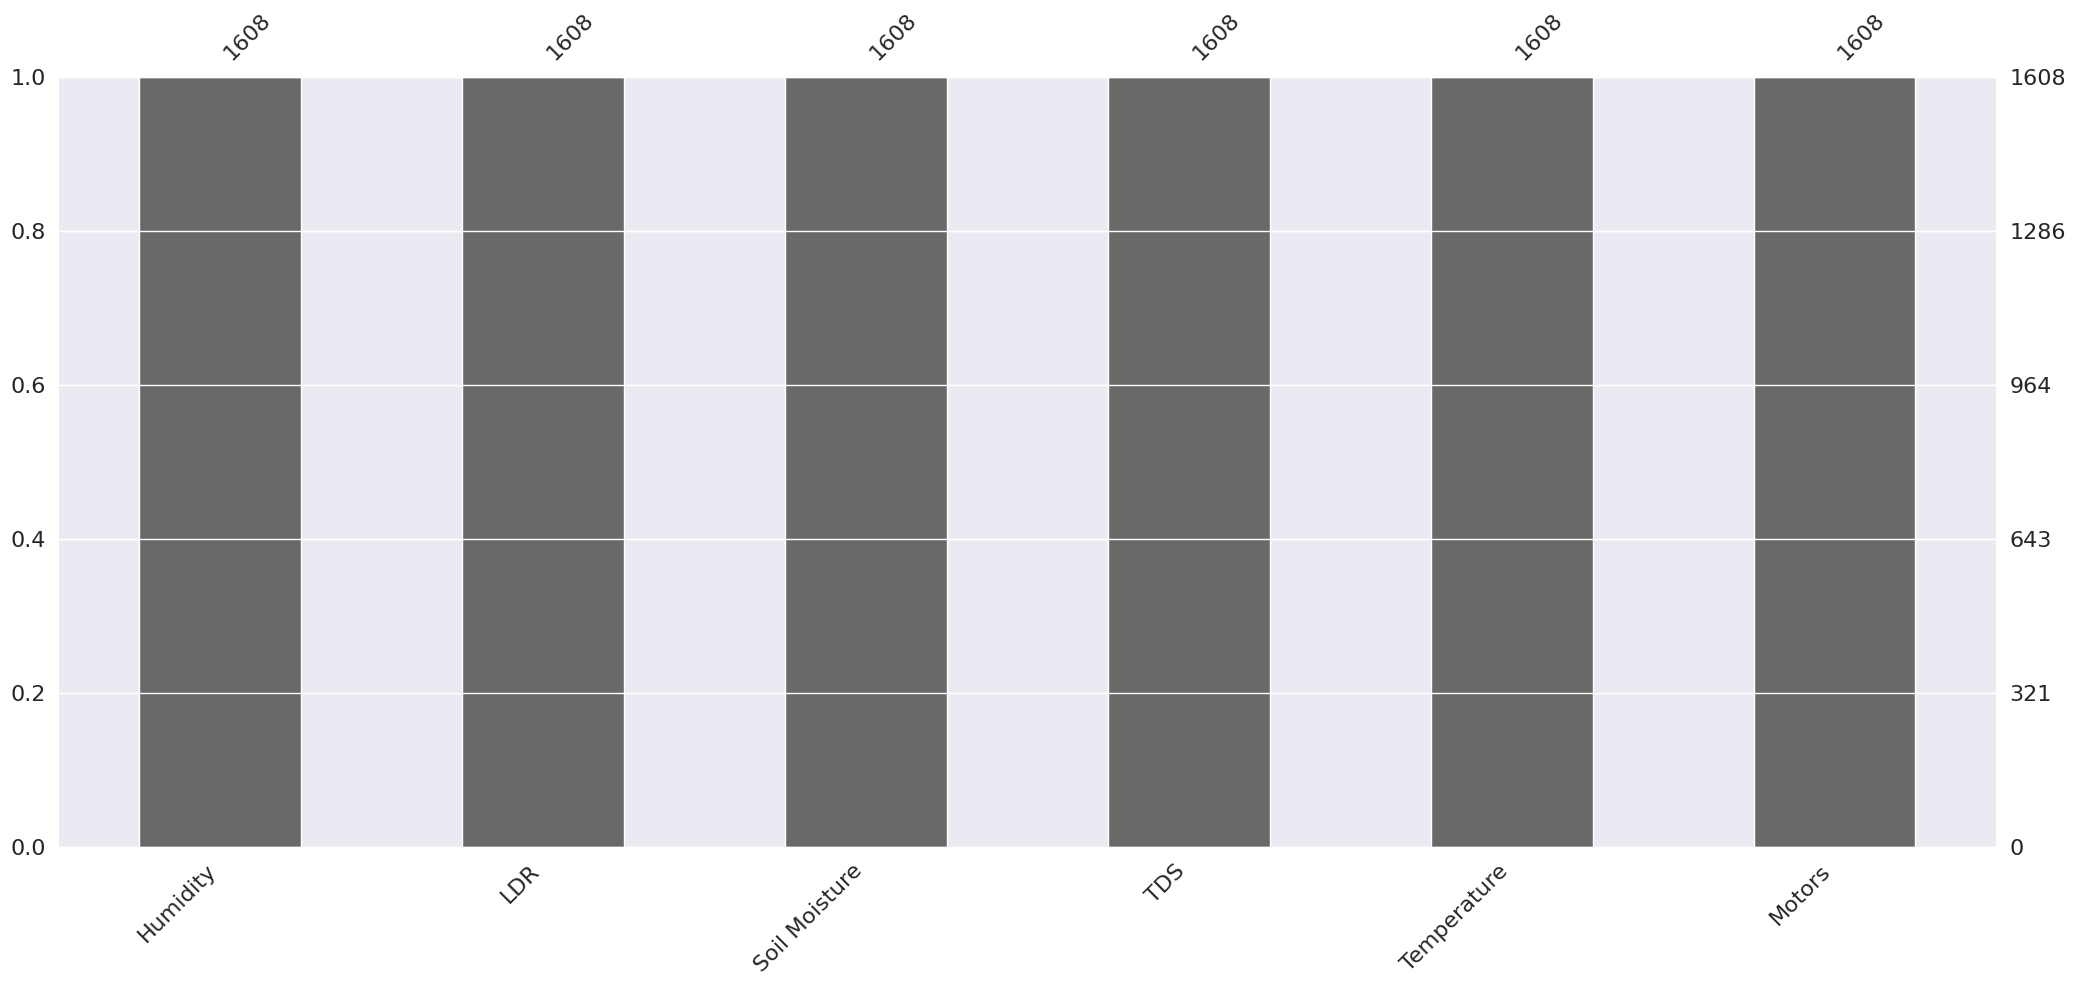

In [ ]:
p = msno.bar(Data_df)

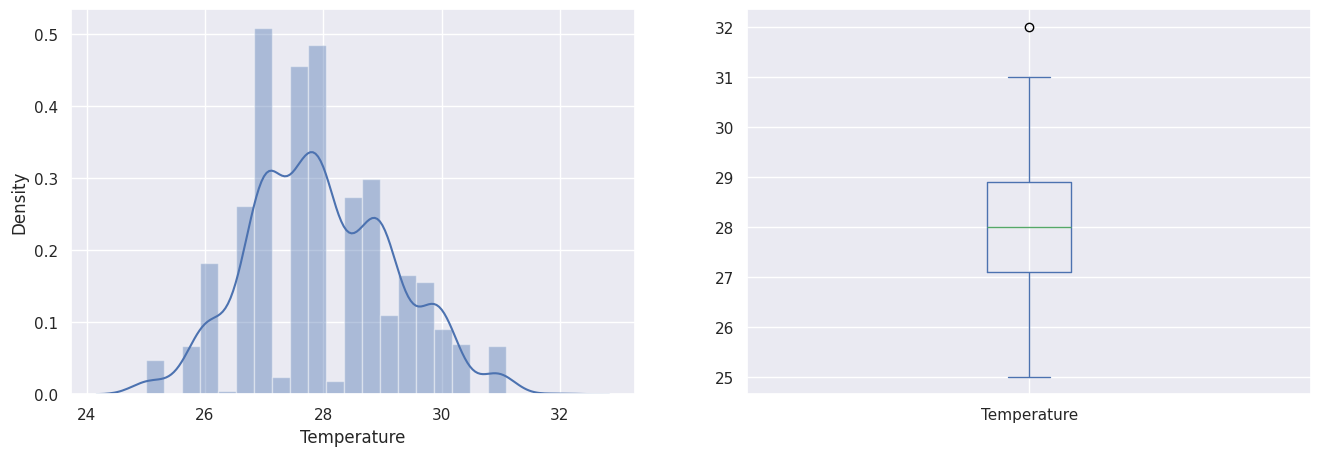

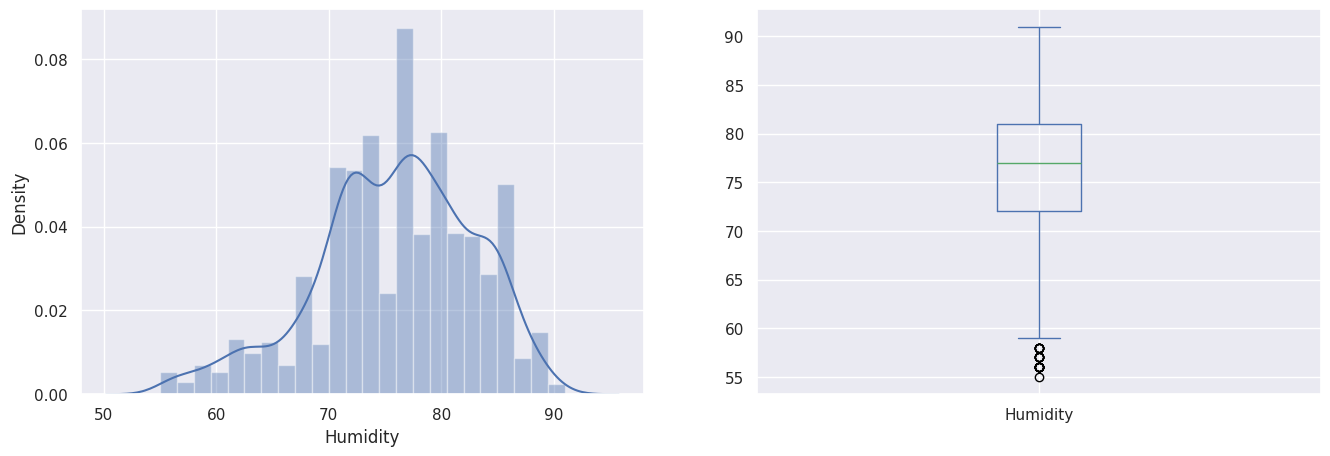

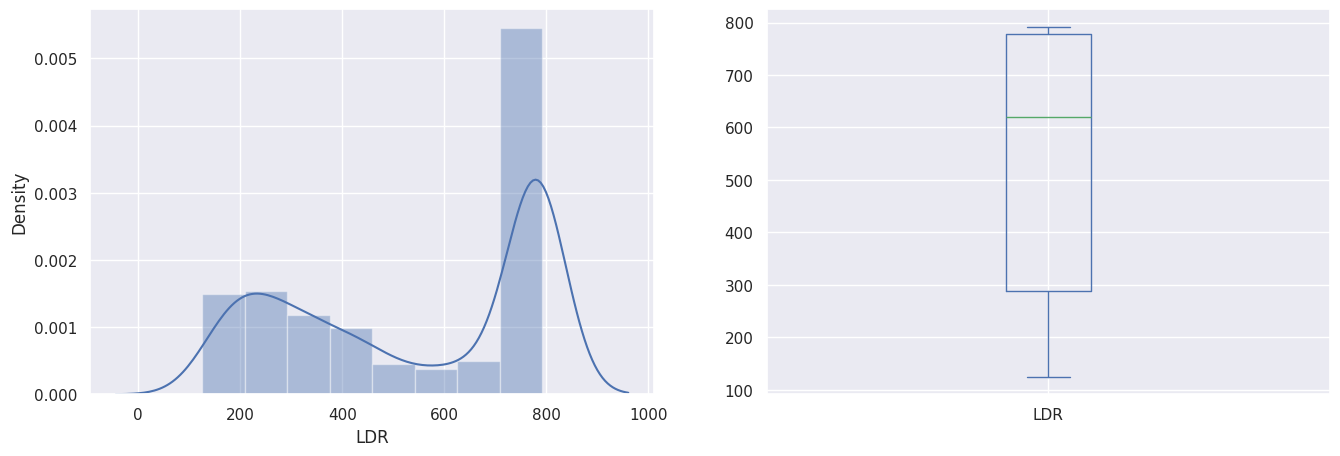

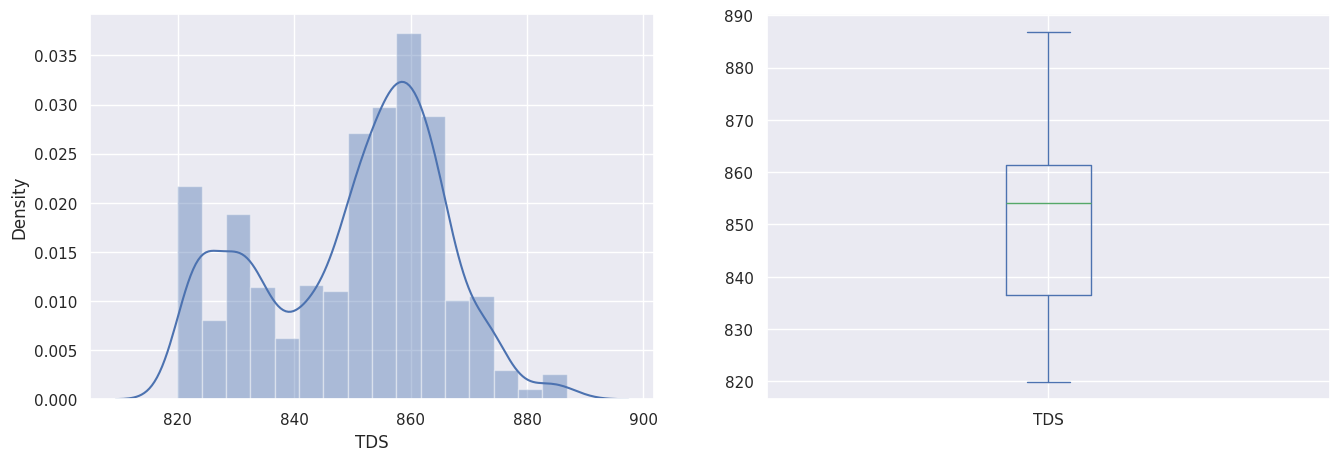

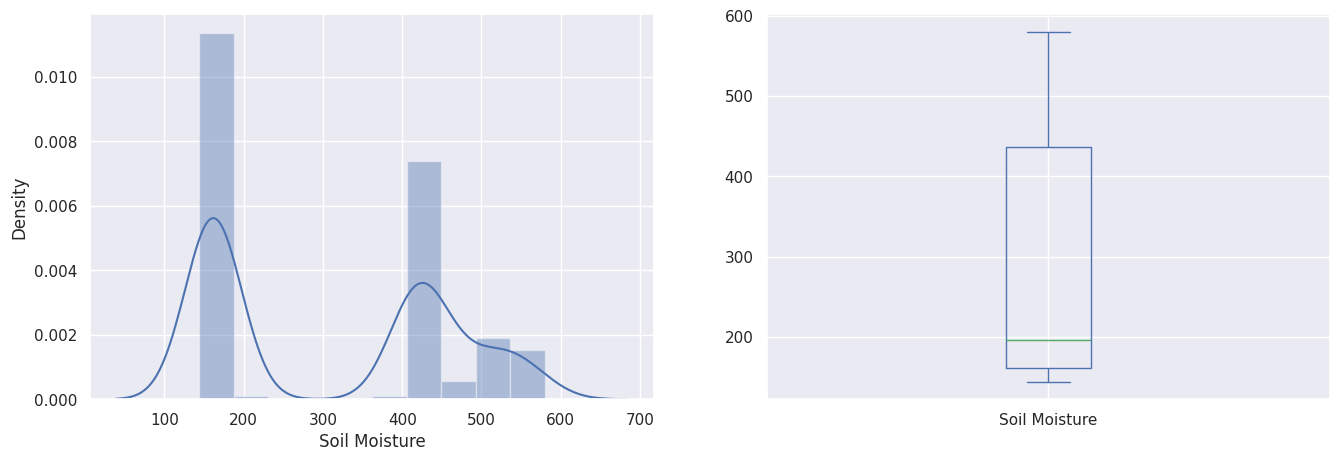

In [ ]:
plt.subplot(121), sns.distplot(Data_df['Temperature'])
plt.subplot(122), Data_df['Temperature'].plot.box(figsize = (16, 5))
plt.show()
plt.subplot(121), sns.distplot(Data_df['Humidity'])
plt.subplot(122), Data_df['Humidity'].plot.box(figsize = (16, 5))
plt.show()
plt.subplot(121), sns.distplot(Data_df['LDR'])
plt.subplot(122), Data_df['LDR'].plot.box(figsize = (16, 5))
plt.show()
plt.subplot(121), sns.distplot(Data_df['TDS'])
plt.subplot(122), Data_df['TDS'].plot.box(figsize = (16, 5))
plt.show()
plt.subplot(121), sns.distplot(Data_df['Soil Moisture'])
plt.subplot(122), Data_df['Soil Moisture'].plot.box(figsize = (16, 5))
plt.show()

Motors
0    1381
1     227
Name: count, dtype: int64


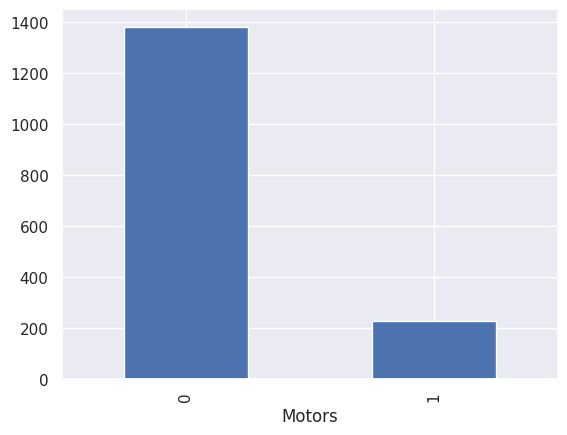

In [ ]:
# TOTAL SAMPLE OF EACH CLASS
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = Data_df["Motors"].map(lambda x: color_wheel.get(x + 1))
print(Data_df.Motors.value_counts())
p = Data_df.Motors.value_counts().plot(kind = "bar")

In [ ]:
# SHOW DATA
Data_df.head()

,Humidity,LDR,Soil Moisture,TDS,Temperature,Motors
0,68,726,193,850.60120,28.0,0
1,72,678,194,838.16528,28.0,0
2,78,208,160,862.27417,29.3,0
3,68,716,196,851.59302,28.0,0
4,66,209,152,886.07788,29.8,0


In [ ]:
# CHECK MISSING VALUE
Data_df.isnull().sum()

,0
Humidity,0
LDR,0
Soil Moisture,0
TDS,0
Temperature,0
Motors,0


In [ ]:
# REPLACES THE VALUE 0 WITH NAN
Data_df_copy = Data_df.copy(deep = True)
Data_df_copy[['Temperature', 'Humidity', 'LDR', 'TDS', 'Soil Moisture']] = Data_df_copy[['Temperature', 'Humidity', 'LDR', 'TDS', 'Soil Moisture']].replace(0, np.NaN)

In [ ]:
# CHECK MISSING VALUE
Data_df_copy.isnull().sum()

,0
Humidity,0
LDR,0
Soil Moisture,0
TDS,0
Temperature,0
Motors,0


In [ ]:
# MISSING VALUE TREATMENT
Data_df_copy['Temperature'].fillna(Data_df_copy['Temperature'].mean(), inplace = True)
Data_df_copy['Humidity'].fillna(Data_df_copy['Humidity'].median(), inplace = True)
Data_df_copy['LDR'].fillna(Data_df_copy['LDR'].median(), inplace = True)
Data_df_copy['TDS'].fillna(Data_df_copy['TDS'].mean(), inplace = True)
Data_df_copy['Soil Moisture'].fillna(Data_df_copy['Soil Moisture'].mean(), inplace = True)

In [ ]:
# SHOW DATA
Data_df_copy.head()

,Humidity,LDR,Soil Moisture,TDS,Temperature,Motors
0,68,726,193,850.60120,28.0,0
1,72,678,194,838.16528,28.0,0
2,78,208,160,862.27417,29.3,0
3,68,716,196,851.59302,28.0,0
4,66,209,152,886.07788,29.8,0


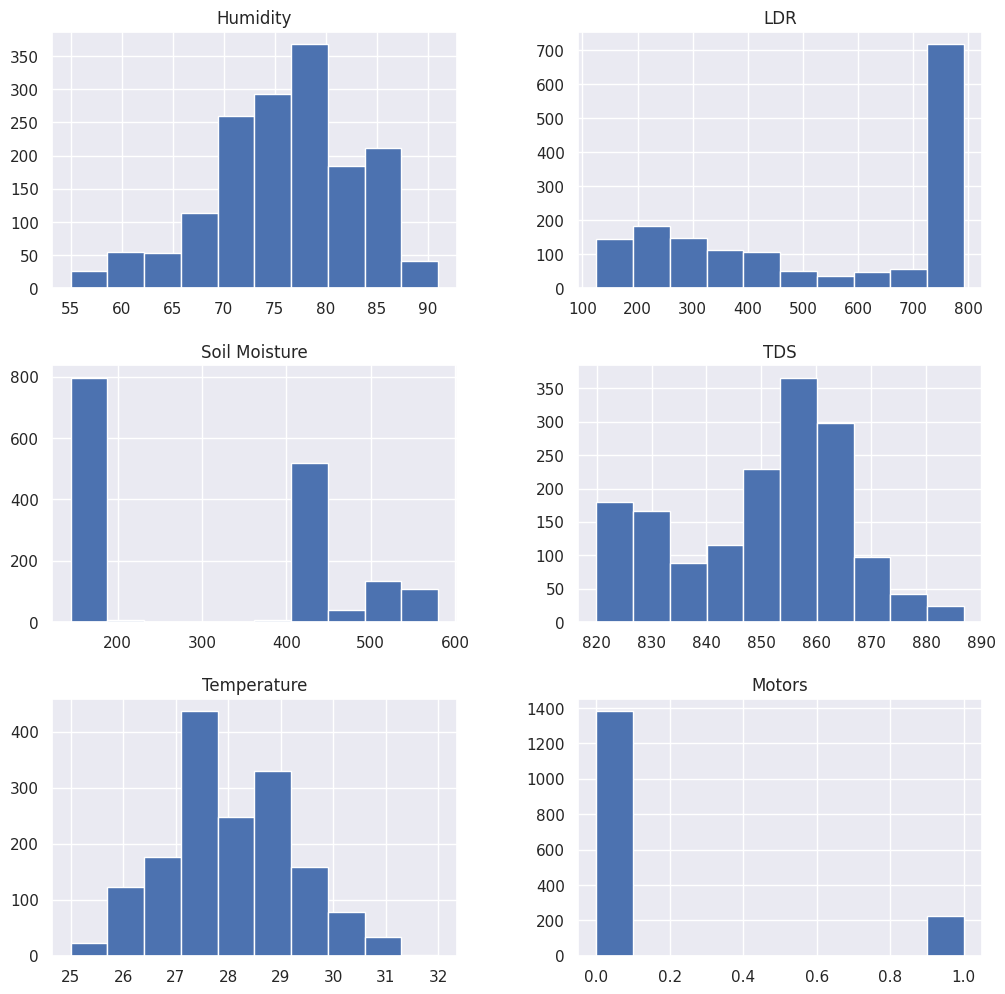

In [ ]:
# HISTOGRAM
p = Data_df_copy.hist(figsize = (12, 12))

In [ ]:
# SPLIT VARIABLES
X = Data_df_copy.drop(['Motors', 'TDS'], axis=1)# independent variables
y = Data_df_copy['Motors'] # dependent variable

In [ ]:
!pip install imblearn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X, y)
print(pd.Series(y_res).value_counts())

Motors
0    1381
1    1381
Name: count, dtype: int64


In [ ]:
# TRAIN TEST SPLIT
# Import Function from Library
from sklearn.model_selection import train_test_split

# Split The Dataset Into Training Set (80%) and Testing Set (20 %)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)

In [ ]:
# Import Function from Library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Import Function from Library
from sklearn.tree import DecisionTreeClassifier

# Train Model
dtree = DecisionTreeClassifier(min_samples_leaf=12)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=12)

In [ ]:
# Prediction Using Test Set
predictions_dtree = dtree.predict(X_test)

# Accuracy
print("Training Accuracy Score =", accuracy_score(y_train, dtree.predict(X_train)))
print("Testing Accuracy Score =", accuracy_score(y_test, predictions_dtree))

# Confusion Matrix
print(confusion_matrix(y_test, predictions_dtree))

# Classification Report
print(classification_report(y_test,predictions_dtree))

Training Accuracy Score = 0.9850611136260752
Testing Accuracy Score = 0.9819168173598554
[[270   9]
 [  1 273]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       279
           1       0.97      1.00      0.98       274

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



In [ ]:
dtree.feature_importances_

array([0.00766947, 0.00190068, 0.98061208, 0.00981777])

<Axes: >

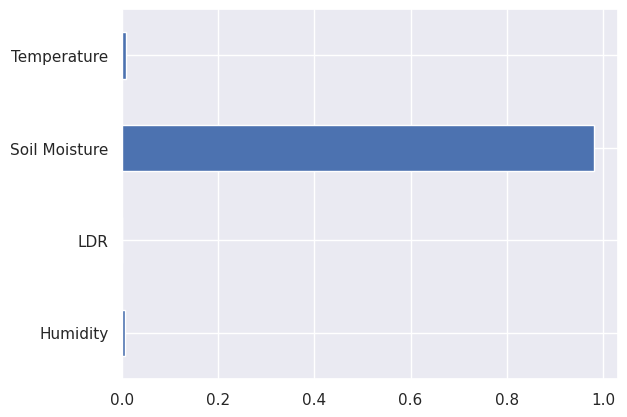

In [ ]:
(pd.Series(dtree.feature_importances_, index = X.columns).plot(kind = 'barh'))

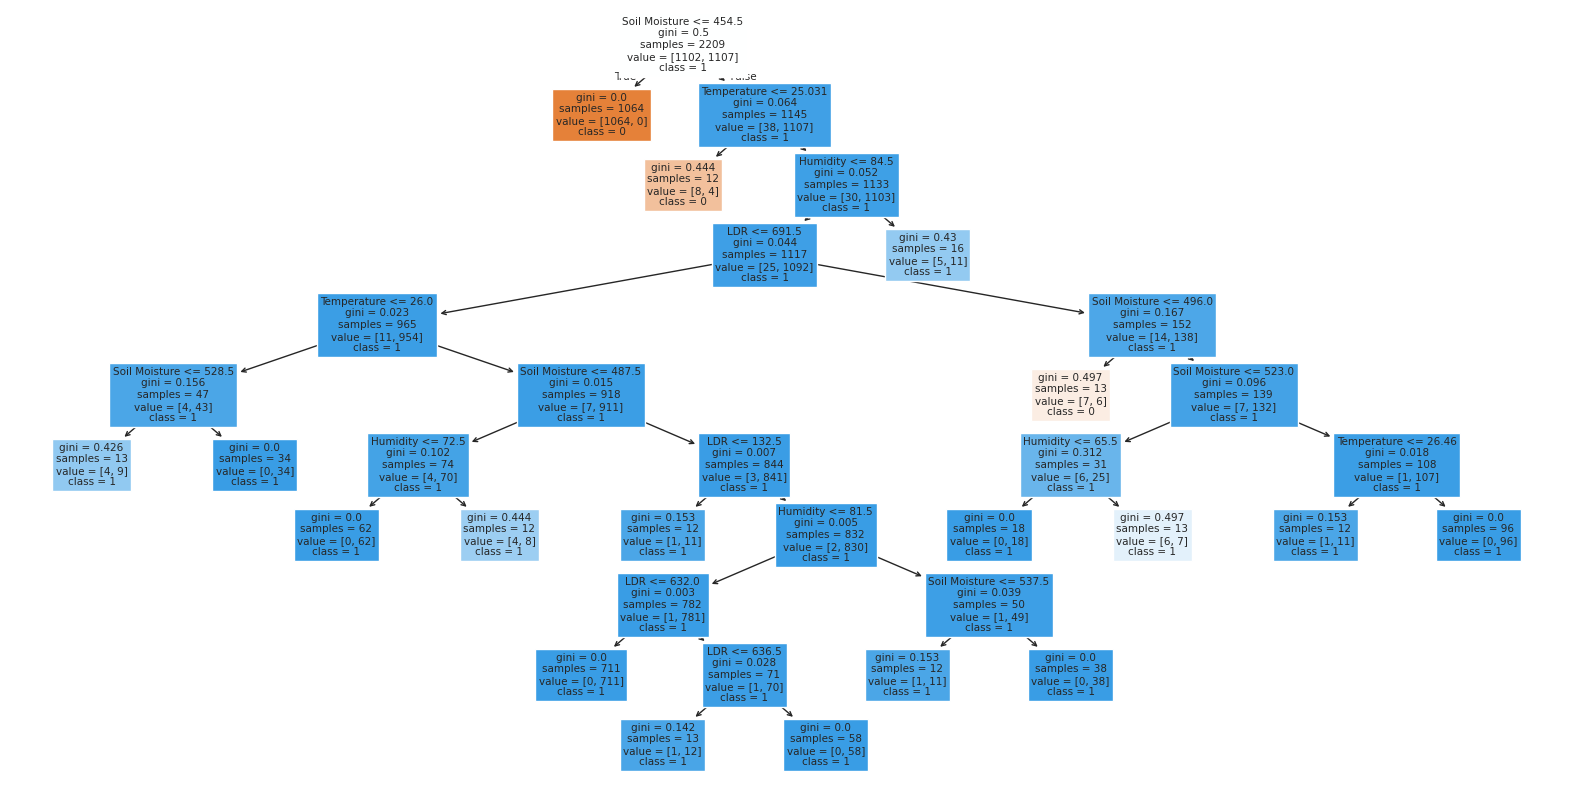

In [ ]:
# prompt: generate the dtree model using sklearn.tree.plot_tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names = X.columns, class_names = ['0','1'], filled = True)
plt.show()

In [ ]:
dtree.predict([[91, 600, 501, 34]])

array([1])

In [ ]:
!pip install micromlgen

In [ ]:
clf = dtree

In [ ]:
from micromlgen import port
clf.fit(X_res, y_res)
print(port(clf))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[2] <= 457.0) {
                            return 0;
                        }

                        else {
                            if (x[3] <= 25.011377334594727) {
                                return 0;
                            }

                            else {
                                if (x[1] <= 604.0) {
                                    if (x[0] <= 81.5) {
                                        if (x[3] <= 26.00011920928955) {
                                            if (x[2] <= 526.5) {
                                                return 1;
                                            }

                                    